## Outliers

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame({
    "Study_Hours": [1,2,3,4,5,6,7,8,20]
})

In [3]:
data 

,Study_Hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [4]:
data.describe()

,Study_Hours
count,9.000000
mean,6.222222
std,5.651942
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,20.000000


## IQR Method

In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers = data[(data < (LB)) |(data > (UB))]

In [6]:
Q1

Study_Hours    3.0
Name: 0.25, dtype: float64

In [7]:
Q3

Study_Hours    7.0
Name: 0.75, dtype: float64

## 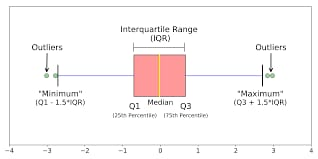

## Z-Score Method


In [8]:
z_scores = np.abs(stats.zscore(data["Study_Hours"]))
z_scores

array([0.98001775, 0.79235477, 0.6046918 , 0.41702883, 0.22936586,
       0.04170288, 0.14596009, 0.33362306, 2.58557873])

In [9]:
outliers = data[z_scores > 2]
outliers

,Study_Hours
8,20


In [10]:
stats.zscore(data["Study_Hours"])

array([-0.98001775, -0.79235477, -0.6046918 , -0.41702883, -0.22936586,
       -0.04170288,  0.14596009,  0.33362306,  2.58557873])

## 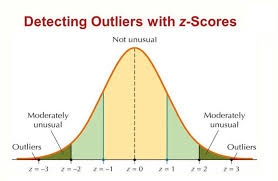

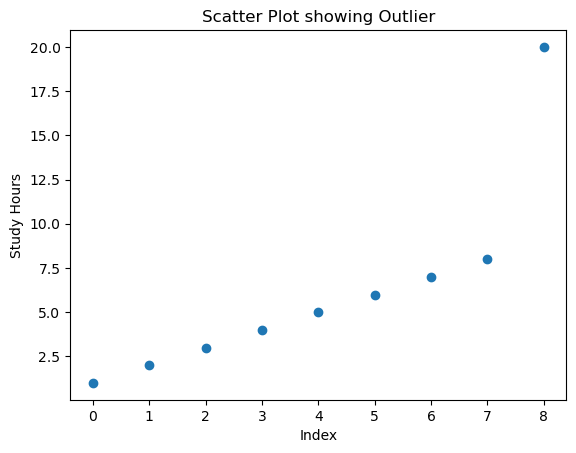

In [11]:
plt.scatter(range(len(data)), data["Study_Hours"])
plt.xlabel("Index")
plt.ylabel("Study Hours")
plt.title("Scatter Plot showing Outlier")
plt.show()

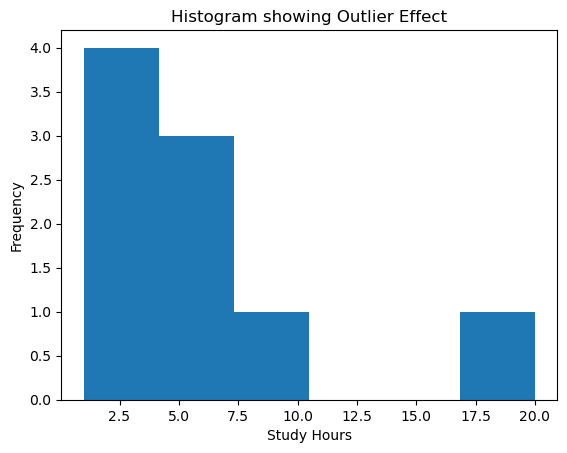

In [12]:
plt.hist(data["Study_Hours"], 6)
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.title("Histogram showing Outlier Effect")
plt.show()